МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем отличается AdaBoost от XGBoost? Перечислите принципиальные отличия. 

В XGBoost для оптимизации в пространстве ответов базовых алгоритмов используются методы второго порядка. В XGBoost функцонал регуляризуется, в AdaBoost нет. В (классическом) AdaBoost используется экспоненциальная функция потерь. В XGBoost используется измененный критерий информативности.

**Вопрос 2**: Почему говорят, что AdaBoost неустойчив к выбросам?

AdaBoost использует экспоненциальную функцию потерь, которая сильно карает за misclassification. Шумовые данные обычно лежат глубоко в своем классе, но имеют неправильный лейбл. В идеале хотелось бы, чтобы шумовые данные были корректно класифицированы алгоритмом, но это не возможно так как тогда это будет грубый misclassification (потому что обучающий алгоритм не знает, что метка на шумовом объекте не правильная) 

**Вопрос 3**:  В каком пространстве градиентный бустинг совершает градиентный спуск? Какова размерность этого пространства?

В пространстве ответов базовых алгоритмов. Если обучающая выборка $X^{(l)}$, то размерность пространства -- $l$.

**Вопрос 4**: В чем заключается сокращение шага в градиентном бустинге? Как число итераций, необходимое для сходимости, зависит от размера шага η?

Изменяется (уменьшается) коэфициент, с которым новый базовый алгоритм добавляется в композицию. Чем меньше размер шага, тем больше должно быть шагов алгоритма до сходимости.

**Вопрос 5**: Что такое стохастический градиентный бустинг?

На каждом шаге градиентного бустинга считаем градиент только на случайно выбранной подвыборке данных, и добавляем базовый алгоритм в композицию.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Boosting</h1> 

1) Задача 1 
![](./img/task11.png)
![](./img/task12.png)


Будем рассматривать $$f(x) = \sum_{i = 1}^l \alpha_i I\{x \in A_i\}$$ -- кусочно постоянные функции, причем $$\coprod_{i = 1}^l A_i = \mathbb{R}$$

Докажем по индукции, что через $n$ точек $(x_1, y_1), \dots, (x_n, y_n)$ на плоскости xOy можно провести кусочно-постоянную функцию c $n$ непересекающимися $A_i$, причем $x_i \in A_i$ и

$$f(x) = \sum_{i = 1}^n y_i I\{x \in A_i\}$$


База $l=1$. Пусть дана точка $(x_1, y_1)$ тогда подходит $f(x) = y_1 \cdot I\{x \in \mathbb{R}\}$

Пусть $l>1$. Рассмотрим $x_{(1)}, \dots, x_{(l)}$ -- точки в порядке соритировки. Для $x_{(1)}, \dots, x_{(l-1)}$ по предположению индукции есть кусочно постоянная 

$$f(x) = \sum_{i = 1}^{l-1} y_{(i)} I\{x \in A_i \}$$ и $x_{(i)} \in A_i$. Так как $\{x_{(i)}\}$ в порядке сортировки и $A_i$ попарно не пересекаются, то $\sup A_{(l-1)} = +\infty$, значит можно разбить $A_{(l-1)} = A_{(l-1)}' \cup A_{(l)}$, что $A_{(l-1)}' \ni x_{(l-1)}$ и $A_{(l)} \ni x_{(l)}$ Переобозначив $A_{(l-1)}'$ как $A_{(l-1)}$ получаем искомое разбиение.


Теперь решим искомую задачу. Пусть также $x_1, \dots, x_n$ отсортированы. Положим $\gamma_1 = y_1$, $\gamma_2 = y_2 - y_1$, $\gamma_3 = y_3 - y_2$, $\gamma_4 = y_4 - y_3$ и так далее. Проведем через $(x_1, 1), \dots (x_l, l)$ кусочно постоянную функцию и положим $t_i = \min_i \inf A_i$. Тогда композиция решающих пней $[x \geq t_i]$ с коэфициентами $\gamma_i$ и будет искомой композицией, кроме того, в ней будет $l$ решающих пней.

2) Найдите градиент логистичиской функции потерь для фиксированного объекта

$$\frac{d}{dz}\log(1 + \exp(-yz)) = \frac{-y}{1 + \exp{yz}}$$

<h1 align="center">Binary Boosting Implementation</h1> 

Нужно реализовать двухклассовый бустинг с логистичиской функцией потерь. 

Длину шага -- или используйте $1.0*lr$ или подбирайте одномерной оптимизацией;

In [178]:
%pylab inline

import warnings
import numpy as np
import pandas as pd
from copy import deepcopy
from utils import plot_surface
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize

warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [554]:
class BinaryBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators, lr=0.1):
        self.lr = lr   
        self.n_estimators = n_estimators
    
    def loss_grad(self, original_y, pred_y):
        return -original_y / (1 + np.exp(original_y * pred_y))
    
    def loss(self, y_true, y_pred):
        return np.sum(np.log(1 + np.exp(-y_true * y_pred)))
        
    def fit(self, X, original_y):
        # Храните базовые алгоритмы тут
        self.estimators_ = []
        self.coefs_ = []
        
        
        zero_est = DecisionTreeRegressor(max_depth=1)
        zero_est.fit(X, np.zeros(original_y.shape))
        self.estimators_.append(zero_est)
        self.coefs_.append(1.0 * self.lr)
        
        
        for i in range(self.n_estimators):
            y_pred = self._predict(X)
            grad = self.loss_grad(original_y, y_pred)
            # Настройте базовый алгоритм на градиент, это классификация или регрессия?
            estimator = DecisionTreeRegressor(max_depth=3)
            estimator.fit(X, grad)
            grad_estimated = estimator.predict(X)
            
            f = lambda alpha: self.loss(original_y, y_pred + alpha * grad_estimated)
            f_grad = lambda alpha: self.loss_grad(original_y, y_pred + alpha * grad_estimated).dot(grad_estimated.reshape(-1, 1))
            
            ans = minimize(f, (0,), jac=f_grad)
            #print(ans.x[0])
            print("Norm grad: {}, loss func: {}, alpha min {}".format(np.sqrt(np.sum(grad ** 2)), self.loss(original_y, y_pred), ans.x[0]))
            
            self.estimators_.append(estimator)
            #self.coefs_.append(-1.0 * self.lr)
            self.coefs_.append(ans.x[0])
        
        self.grad_abs_ = np.abs(grad)
        self.out_ = self.outliers(self.grad_abs_)

        return self

    def _predict(self, X):
        y_pred = np.zeros(len(X))
        for est, coef in zip(self.estimators_, self.coefs_):
            y_pred += coef * est.predict(X)
        return y_pred
    
    def predict(self, X):
        y_pred = self._predict(X)
        return y_pred > 0
    
    def outliers(self, grad):
        return np.argsort(grad)[:-10:-1]

<h1 align="center">Simple test</h1> 

In [555]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)
y = 2*(y-0.5)

Norm grad: 11.1803398875, loss func: 346.57359028, alpha min -5.45913127324
Norm grad: 8.06237688425, loss func: 207.317563181, alpha min -6.93077056677
Norm grad: 7.66902982893, loss func: 190.292275912, alpha min -5.3813811553
Norm grad: 7.06703745768, loss func: 167.584809152, alpha min -17.024309054
Norm grad: 6.79755178494, loss func: 155.137825733, alpha min -9.57064408461
Norm grad: 6.3384249507, loss func: 137.684532922, alpha min -11.628530604
Norm grad: 6.18729665014, loss func: 131.033017123, alpha min -10.4838788131
Norm grad: 5.99702328834, loss func: 124.5599124, alpha min -14.0309644046
Norm grad: 5.67659426004, loss func: 113.152451271, alpha min -7.95327628159
Norm grad: 5.49322187895, loss func: 108.341606773, alpha min -9.9921330865
Norm grad: 5.24172999335, loss func: 100.472140829, alpha min -10.5552212678
Norm grad: 4.95398165761, loss func: 90.4228652012, alpha min -13.0039654557
Norm grad: 4.71047066867, loss func: 83.049079064, alpha min -14.9468001473
Norm gra

1.0

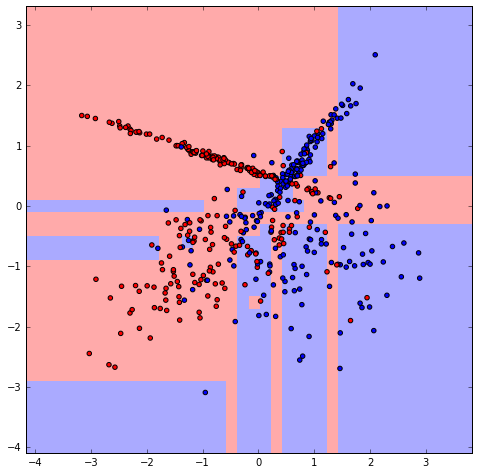

In [556]:
clf = BinaryBoostingClassifier(n_estimators=500).fit(X, y)
plot_surface(X, y, clf)
accuracy_score(y == 1, clf.predict(X))

<h1 align="center">Outliers</h1> 

In [557]:
clf.grad_abs_[clf.out_]

array([ 0.00796913,  0.00308626,  0.00304545,  0.00252857,  0.00246741,
        0.0021141 ,  0.00208634,  0.00183797,  0.00183797])

In [558]:
clf.out_

array([ 74, 464, 191, 206,  40, 108, 299, 236, 422])

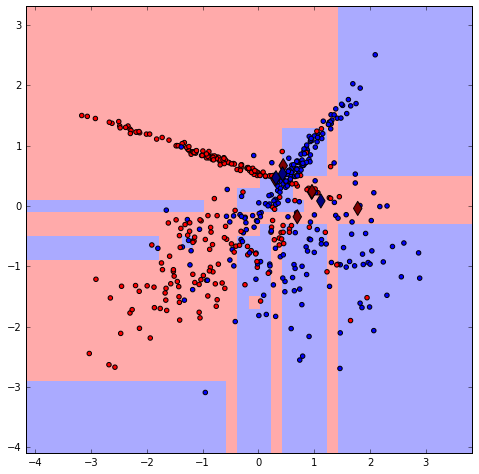

In [559]:
plot_surface(X, y, clf)
plt.scatter(X[clf.out_].T[0], X[clf.out_].T[1], s=100, c=-y[clf.out_], marker='d')

<h1 align="center">Adult test</h1> 

In [560]:
#!sh ./get_data.sh

In [561]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [562]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
y = 2*(y-0.5)

In [563]:
X_train, y_train, X_test, y_test = X[:25000], y[:25000], X[25000:], y[25000:]

In [564]:
clf = BinaryBoostingClassifier(n_estimators=25, lr=3.0)
clf.fit(X_train, y_train)

Norm grad: 79.0569415042, loss func: 17328.679514, alpha min -5.99391682024
Norm grad: 53.8037751401, loss func: 9183.26868376, alpha min -7.6878974837
Norm grad: 51.6719344531, loss func: 8475.86884529, alpha min -8.13638891131
Norm grad: 50.8749311846, loss func: 8209.64018848, alpha min -7.91726667283
Norm grad: 50.4695987347, loss func: 8073.30235535, alpha min -7.43428217503
Norm grad: 49.8113256634, loss func: 7876.00115858, alpha min -10.2370220352
Norm grad: 49.4655688716, loss func: 7746.80819648, alpha min -8.57427243972
Norm grad: 48.9032358373, loss func: 7587.06660374, alpha min -7.90975010157
Norm grad: 48.658881982, loss func: 7507.15859252, alpha min -7.0481527187
Norm grad: 48.3868709008, loss func: 7434.0746295, alpha min -8.67199975554
Norm grad: 48.1583084619, loss func: 7374.69076452, alpha min -8.81726464768
Norm grad: 48.0131663586, loss func: 7334.41510754, alpha min -12.9620744367
Norm grad: 47.8160243349, loss func: 7266.17514684, alpha min -8.9390438262
Norm 

BinaryBoostingClassifier(lr=3.0, n_estimators=25)

In [565]:
accuracy_score(y_train == 1, clf.predict(X_train))

0.878

In [566]:
accuracy_score(y_test == 1, clf.predict(X_test))

0.86589075519111225

In [546]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=4, max_features="sqrt")
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.99996
0.85226821849


In [553]:
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3)
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.86188
0.8603359344


In [543]:
?RandomForestClassifier

<h1 align="center">Text classification</h1> 

- Найдите двухклассовый текстовый датасет (в качестве примера sentiment analysis) или возьмите многоклассовый и классифцируйте один клас против остальных
- Попробуйте бустинг на решающих деревьях, в качестве фичей используйте tf-idf и svd/random_projection/hashing_trick, что работает лучше? Сравните качество и время работы.

<h1 align="center">Random Forest vs Boosting</h1> 

Подберите 2+ датасета как минимум большой и маленький (не использованных в этом дз) и проведите сравнение random forest и градиентного бустинга, используйте реализации алгоритмов из библиотеки sklearn.

- Опишите результаты, почему тот или другой алгоритм на конкретном датасете работает лучше/хуже?
- Как вы настраивали гиперпараметры алгоритмов?
- Как вы проверяли качесво алгоритмов?

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте мультиклассовый бустинг -- проверьте на CIFAR10 + SVD
- Попробуйте различные функции потерь, придумайте несколько своих, удалось ли обойти логистичискую и экспоненциальную?